Importing pandas, ntlk(for stopwords)

Downloaded stopwords using nltk library

In [45]:
import pandas as pd
import re
import pandas as pd
import csv
# !pip install nltk
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Mounting Google Drive 



In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the text file(nytimes_news_articles.txt) which is located in google drive path(/content/drive/MyDrive/Warm-up Project_Prin of Big Data Mgmt/nytimes_news_articles.txt)

In [52]:
csvfile = open("/content/drive/MyDrive/Warm-up Project_Prin of Big Data Mgmt/nytimes_news_articles.txt")
reader = csv.reader(csvfile, quoting=csv.QUOTE_NONE)
new_list=[]
count = 0
first_url = 0
current_doc=""
old_url =""
for lines_list in reader:
    for line in lines_list:
      if "URL: http://www.nytimes.com" in line:
        if first_url != 0 and '/us/politics/' not in old_url:  
          new_list.append(current_doc)
          current_doc = ""
        else:
          current_doc=""
        old_url = line
      elif line.strip():
        first_url = 1
        current_doc = current_doc + line

In [48]:
current_doc

'PALOS VERDES ESTATES Calif. — From high atop the oceanside cliffs the shimmering blue-green water of Lunada Bay appears to be a surfer’s dream.But by the time surfers put on their wet suits some may be having second thoughts. There are the taunts and the peltings of dirt and rocks they may face as they climb down the hill.And if they make it into the water they risk confrontation with a band of residents known widely as the Bay Boys who have long been accused of zealously — and sometimes violently — claiming the epic waves here as their exclusive territory.“The last time I surfed out there these guys tried to really hurt me” said Chris Taloa 42 who for years lived in nearby Redondo Beach. “A guy tried to ram a board into my ribs.”But after intimidation that has kept outsiders like Mr. Taloa away for generations a group of surfers is fighting to open up the beach to all comers. A class-action lawsuit filed last month by the Coastal Protection Rangers and two surfers seeks to bar the Ba

Creating a list of data in column called doc_data

In [53]:
df_op = pd.DataFrame(new_list, columns=['doc_data'])

Storing all downloaded stop words in the variable stop 

In [54]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

Displaying all the stop words

In [55]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Removing stopwords from the list of data in the text file

In [60]:
df_op['without_stop_words'] = df_op['doc_data'].apply(lambda x: [item for item in x.split() if item not in stop])

In [61]:
df_op['count'] = df_op['without_stop_words'].apply(lambda x: len(x))

Displaying the first five rows with out stop words and the word count

In [62]:
df_op.head(5)

,doc_data,without_stop_words,count
0,WASHINGTON — Stellar pitching kept the Mets af...,"[WASHINGTON, —, Stellar, pitching, kept, Mets,...",469
1,Mayor Bill de Blasio’s counsel and chief legal...,"[Mayor, Bill, de, Blasio’s, counsel, chief, le...",319
2,In the early morning hours of Labor Day last y...,"[In, early, morning, hours, Labor, Day, last, ...",457
3,It was the Apple Store in New York City before...,"[It, Apple, Store, New, York, City, thing, App...",417
4,OMAHA — The United States Olympic swimming tri...,"[OMAHA, —, The, United, States, Olympic, swimm...",593


displaying the output of all articles data by removing stopwords

In [56]:
df_op

,doc_data
0,WASHINGTON — Stellar pitching kept the Mets af...
1,Mayor Bill de Blasio’s counsel and chief legal...
2,In the early morning hours of Labor Day last y...
3,It was the Apple Store in New York City before...
4,OMAHA — The United States Olympic swimming tri...
...,...
8274,QUITO Ecuador — The strongest earthquake to st...
8275,New York City officers shot and killed a 32-ye...
8276,On April 1 police officers from the 108th Prec...
8277,KHILAD India — The cattle camp on a dusty back...


In [ ]:
#plotting the histogram

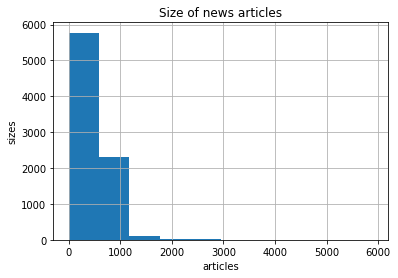

In [63]:
hist= df_op.hist(column='count')
for ax in hist.flatten():
    ax.set_xlabel("articles")
    ax.set_ylabel("sizes")
    ax.set_title('Size of news articles')